# Combinatorial k-means procedure
## Developed by S. Madurga

In [1]:
# needed imports
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

# More Modules
import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import itertools

# Example of data generation for 2 descriptors

(49, 2)


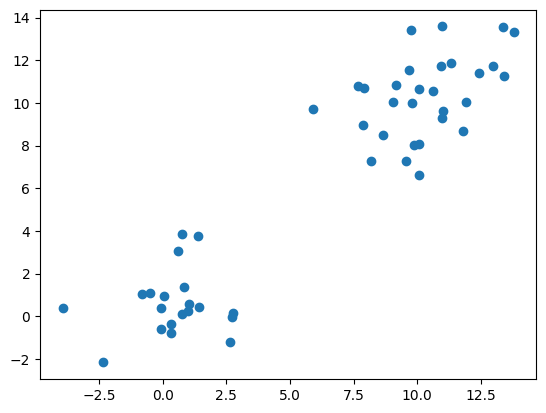

In [2]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4700)  # for repeatability of this tutorial
a = np.random.multivariate_normal([0, 0], [[3, 1], [1, 3]], size=[20,])
b = np.random.multivariate_normal([10, 10], [[3, 1], [1, 3]], size=[29,])
X = np.concatenate((a, b))
print (X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

# Generation of clustering data. X, Y, X has 3 clusters with 3 Descriptors

(45,)


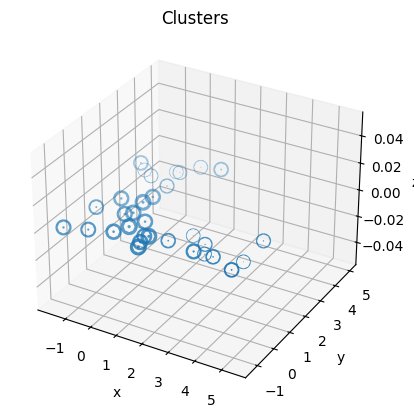

In [9]:
np.random.seed(4781)  # for repeatability of this tutorial

POSITION=3.6  # This parameter indicates the separation among clusters.

def genera_XYZ(POSITION):
    SIZE_GRUPS=15
    puntsc1=np.random.multivariate_normal([POSITION, 0,0], [[1, 0,0], [0, 1,0],[0,0,1]],SIZE_GRUPS)
    puntsc2=np.random.multivariate_normal([0, POSITION,0], [[1, 0,0], [0, 1,0],[0,0,1]],SIZE_GRUPS)
    puntsc3=np.random.multivariate_normal([0, 0,POSITION], [[1, 0,0], [0, 1,0],[0,0,1]],SIZE_GRUPS)
    XYZ = np.concatenate((puntsc1, puntsc2,puntsc3),)

    X=XYZ[:,0]
    Y=XYZ[:,1]
    Z=XYZ[:,2]
    return X,Y,Z

    
X,Y,Z=genera_XYZ(POSITION)    
    
print (X.shape)  # 150 samples with 2 dimensions


descriptors=['x','y','z']

ax = fig = plt.figure().add_subplot(projection='3d')
ax.set_xlabel(descriptors[0])
ax.set_ylabel(descriptors[1])
ax.set_zlabel(descriptors[2])
    
plt.title('Clusters')
plt.scatter(X, Y,Z,linewidths=10)
plt.show()




## Generation of the rest of columns. Not correlated. 

In [10]:
names_Columns=['X','Y' ,'Z', 'S1','S2','S3','S4','S5','S6','S7','S8','S9','S10',
               'S11','S12','S13','S14','S15','S16','S17','S18','S19','S20',
               'S21','S22','S23','S24','S25','S26','S27']

def genera_AltresDades(X,Y,Z):
    sigma=1
    center=1
    NUMBER_OF_POINTS=45   # Debe de ser el SIZE_GRUPS*3 (vab local)
    Matrix=np.random.normal([center], [sigma],NUMBER_OF_POINTS)  # Number of PATIENTS

    for i in range(2,28):                          # Number of Clinical Variables  28+3 -1 = 30
        S1=np.random.normal(0,sigma,NUMBER_OF_POINTS)
        Matrix=np.column_stack((Matrix,S1))
    

    all_data=np.column_stack((X,Y,Z,Matrix))    
    

    df_teo=pd.DataFrame (all_data,columns=names_Columns)
    return df_teo

    
df_teo=genera_AltresDades(X,Y,Z)    
    
df_teo.mean()

X      1.162308
Y      1.209828
Z      1.231056
S1     1.284013
S2     0.024070
S3     0.082903
S4    -0.232750
S5     0.245650
S6     0.182861
S7    -0.046088
S8     0.148854
S9    -0.161477
S10    0.009337
S11    0.070146
S12   -0.045308
S13    0.090534
S14   -0.075118
S15    0.075324
S16    0.028455
S17    0.159666
S18   -0.028970
S19    0.058005
S20   -0.435212
S21   -0.068266
S22    0.005107
S23    0.023448
S24    0.202936
S25    0.041177
S26   -0.122991
S27   -0.026791
dtype: float64

# Normalization of the data


In [11]:
def Normalization_data(df_teo):
    df_Normalit=df_teo/df_teo.std()     # Normalization by std.  Not Centered
    return df_Normalit
    
df_Normalit=Normalization_data(df_teo)
    
df_Normalit.head()
    


,X,Y,Z,S1,S2,S3,S4,S5,S6,S7,...,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27
0,2.367248,-0.332131,0.829781,-0.398829,-0.963018,-0.398237,0.983449,-1.240638,-1.644450,-0.564127,...,0.222072,-0.789256,0.187081,-0.005175,-1.725488,1.263911,0.226830,-1.351117,-1.705420,0.984157
1,0.995875,-0.051039,0.777648,0.660805,-0.648776,0.177713,-1.303082,-0.427271,-1.195965,1.929626,...,-0.267699,-1.363455,-0.681736,0.363863,0.250394,-1.188531,0.229700,0.810578,-0.135493,1.252715
2,2.003612,0.497841,-0.081123,2.242625,-0.113519,-1.472133,1.795653,-0.029761,0.021618,0.602683,...,-1.266180,-1.652554,-0.407725,-0.423271,-0.199027,0.145410,-1.310768,-0.781775,-1.100293,-1.194203
3,2.412903,-0.015947,0.180216,0.574376,-1.304138,0.977371,1.775026,-0.192810,-0.623536,-0.253726,...,0.446530,0.887612,-0.895789,-0.611251,-1.678236,-0.201276,-1.579942,1.986253,0.528455,-0.120345
4,2.137879,0.258767,-0.703620,2.133087,-0.019785,-0.546391,1.093689,-0.105261,0.355384,0.850944,...,2.097543,0.387251,-1.044645,-0.698551,1.565531,1.973276,1.371590,0.085425,-0.473464,-0.580865


# Clustering Minimizing the Variance

In [12]:
Min_Number_in_Cluster=3

In [16]:
def calc_kmeans_3descriptors_3clusters(descriptors,method_linkage='ward'):
    """Return a std of 100 if number of points less than Min_Number_in_Cluster"""
    DESC1,DESC2,DESC3=descriptors
    k_clusters=3
    
    df_NoNull=df_Normalit[descriptors].dropna()  # Elimina valores nulos
    
    Zlink=hierarchy.linkage(df_NoNull[[DESC1,DESC2,DESC3]],method=method_linkage)
    clusters_k=hierarchy.fcluster(Zlink, k_clusters, criterion='maxclust')
    
    #Afegim informació del cluster:
    df_NoNull['cluster']=clusters_k
    
    std_Desc1_cluster_1=np.std(df_NoNull[DESC1][clusters_k==1])
    std_Desc1_cluster_2=np.std(df_NoNull[DESC1][clusters_k==2])
    std_Desc1_cluster_3=np.std(df_NoNull[DESC1][clusters_k==3])
    std_Desc2_cluster_1=np.std(df_NoNull[DESC2][clusters_k==1])
    std_Desc2_cluster_2=np.std(df_NoNull[DESC2][clusters_k==2])
    std_Desc2_cluster_3=np.std(df_NoNull[DESC2][clusters_k==3])
    std_Desc3_cluster_1=np.std(df_NoNull[DESC3][clusters_k==1])
    std_Desc3_cluster_2=np.std(df_NoNull[DESC3][clusters_k==2])
    std_Desc3_cluster_3=np.std(df_NoNull[DESC3][clusters_k==3])
    
    
   
    #distance_clusters=np.sqrt((average_Desc1_cluster_1-average_Desc1_cluster_2)**2+(average_Desc2_cluster_1-average_Desc2_cluster_2)**2)
    #Sum_std= std_Desc1_cluster_1+std_Desc1_cluster_2+std_Desc1_cluster_3
    #Sum_std+=std_Desc2_cluster_1+std_Desc2_cluster_2+std_Desc2_cluster_3
    #Sum_std+=std_Desc3_cluster_1+std_Desc3_cluster_2+std_Desc3_cluster_3
    
    # VARIANCE
    V=2
    Sum_std= std_Desc1_cluster_1**V+std_Desc1_cluster_2**V+std_Desc1_cluster_3**V
    Sum_std+=std_Desc2_cluster_1**V+std_Desc2_cluster_2**V+std_Desc2_cluster_3**V
    Sum_std+=std_Desc3_cluster_1**V+std_Desc3_cluster_2**V+std_Desc3_cluster_3**V
    
    

    #print('DESC1:',DESC1,average_Desc1_cluster_1,average_Desc1_cluster_2)
    #print('DESC2:',DESC2,average_Desc2_cluster_1,average_Desc2_cluster_2)
#    print('Distance:',distance_clusters)
    #print('STD1:',DESC1,std_Desc1_cluster_1,std_Desc1_cluster_2)
    #print('STD2:',DESC2,std_Desc2_cluster_1,std_Desc2_cluster_2)
    #print('Sum_std: ',Sum_std)
    #print(clusters_k)

    num_in_cluster_1=np.sum(clusters_k==1)
    num_in_cluster_2=np.sum(clusters_k==2)
    num_in_cluster_3=np.sum(clusters_k==3)
    
    #print(num_in_cluster_1,num_in_cluster_2,num_in_cluster_3)
    
    if num_in_cluster_1<Min_Number_in_Cluster or num_in_cluster_2<Min_Number_in_Cluster or num_in_cluster_3<Min_Number_in_Cluster:
        Sum_std=100    # No considerar cluster con 1 punto.
    
    
    # Si solo hay un cluster, el resultado es un nan (no hay resultados de otros clusters)
    return Sum_std,df_NoNull

def plot_clust3d(df_plot,descriptors):
    from mpl_toolkits.mplot3d import axes3d
    ax = plt.figure().add_subplot(projection='3d')
    ax.set_xlabel(descriptors[0])
    ax.set_ylabel(descriptors[1])
    ax.set_zlabel(descriptors[2])
    
    plt.title('Clusters')
    #plt.xlabel(descriptors[0])
    #plt.ylabel(descriptors[1])
    #plt.zlabel(descriptors[2])
    
    ax.scatter(df_plot[descriptors[0]],df_plot[descriptors[1]],df_plot[descriptors[2]],c=df_plot['cluster'])
    plt.show()

## Plot of the 3 grups

['X', 'Y', 'Z'] Suma std: 2.298161140656105


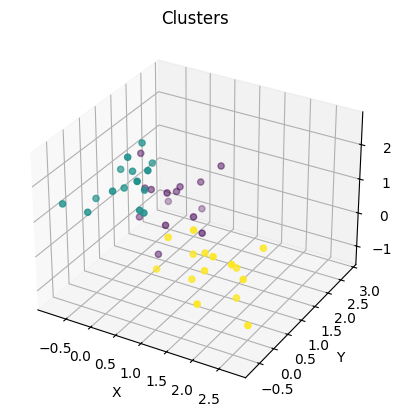

In [17]:
descriptors=['X', 'Y', 'Z'] 
Suma_std,df_p=calc_kmeans_3descriptors_3clusters(descriptors,'centroid')
print(descriptors,'Suma std:',Suma_std)
plot_clust3d(df_p,descriptors)

## Plot of variables S1, S2, S3. Without groups

['S1', 'S2', 'S3'] Suma std: 100


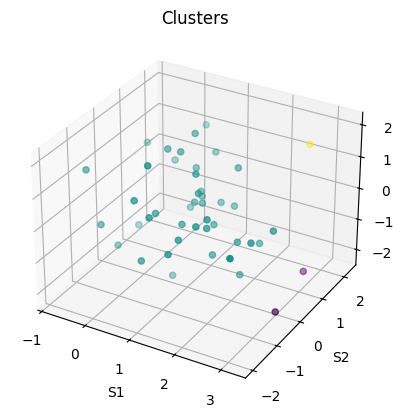

In [18]:
descriptors=['S1', 'S2', 'S3'] 
Suma_std,df_p=calc_kmeans_3descriptors_3clusters(descriptors,'centroid')
print(descriptors,'Suma std:',Suma_std)
plot_clust3d(df_p,descriptors)

## Method of linkage

In [19]:
MLink='centroid'

# 3 Descriptors, 3 clusters. 

# Procedure to analyze 1 case

In [20]:
AH_3desc_3clust=[]

Cols_combination=names_Columns.copy()


result=[]
for triplet in list(itertools.combinations(Cols_combination,3)):
    
    descriptors=list(triplet)
    
    Suma_var,df_p=calc_kmeans_3descriptors_3clusters(descriptors,method_linkage=MLink)
    result.append([Suma_var,descriptors])
    if Suma_var < 2.5:
            print(descriptors, Suma_var, 'points ',len(df_p))
            AH_3desc_3clust.append(triplet)
    
    #plot_cluster2d(df_2descript,descriptors,

['X', 'Y', 'Z'] 2.298161140656105 points  45


In [21]:
result.sort()
if result[0][1]==['X','Y','Z']:
    print('Ranked first')

Ranked first


In [22]:
descriptors=['X','Y','Z']
Suma_var,df_p=calc_kmeans_3descriptors_3clusters(descriptors,method_linkage=MLink)
Suma_var

2.298161140656105

In [23]:
print('Separation:',POSITION,Suma_var)
#Sigma vs Ranked XYZ solution


Separation: 3.6 2.298161140656105


In [24]:
# Saved Results

# Procedure for Automatic Generation

In [25]:
POSITION=3.0
Min_Number_in_Cluster=3
REPETITIONS=10

def analisi_clustering(POSITION,REPETITIONS):
    global df_Normalit
    contador=0
    rankedfirst=0
    for rep in range(REPETITIONS):
        print('\r',rep,end=' ')
        X,Y,Z=genera_XYZ(POSITION)
        df_teo=genera_AltresDades(X,Y,Z)  
        #print(df_teo.head())
        df_Normalit=Normalization_data(df_teo)
        #print(df_Normalit.head())
        
        result=[]
        
        Cols_combination=names_Columns.copy()
        for triplet in list(itertools.combinations(Cols_combination,3)):

            descriptors=list(triplet)

            Suma_var,df_p=calc_kmeans_3descriptors_3clusters(descriptors,method_linkage=MLink)
            result.append([Suma_var,descriptors])
            #if Suma_var < 2.5:
            #        print(descriptors, Suma_var, 'points ',len(df_p))
            #        AH_3desc_3clust.append(triplet)

        result.sort()
        contador+=1
        if result[0][1]==['X','Y','Z']:
            #print('Ranked first')
            rankedfirst+=1
    print('\nRESULT',POSITION,rankedfirst,'from ',contador,'prob_first: ',rankedfirst/contador*100)

## First calculation.
### 4 Repetitions for each case (Position)
### Pos: variable that indicates the separation among grups

In [26]:
Rep=4
for Pos in [2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]:
    analisi_clustering(Pos,Rep)

 3 
RESULT 2.2 1 from  4 prob_first:  25.0
 3 
RESULT 2.3 1 from  4 prob_first:  25.0
 3 
RESULT 2.4 0 from  4 prob_first:  0.0
 3 
RESULT 2.5 1 from  4 prob_first:  25.0
 3 
RESULT 2.6 0 from  4 prob_first:  0.0
 3 
RESULT 2.7 2 from  4 prob_first:  50.0
 3 
RESULT 2.8 2 from  4 prob_first:  50.0
 3 
RESULT 2.9 2 from  4 prob_first:  50.0
 3 
RESULT 3.0 4 from  4 prob_first:  100.0


## Calculation with 100 repetitions

In [ ]:
Rep=100
for Pos in [2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0,3.1,3.2,3.3,3.4,3.5]:
    analisi_clustering(Pos,Rep)

 77 

For 100 Rep
RESULT 2.2 4 from  100 prob_first:  4.0
RESULT 2.3 8 from  100 prob_first:  8.0
RESULT 2.4 10 from  100 prob_first:  10.0
RESULT 2.5 11 from  100 prob_first:  11.0
RESULT 2.6 20 from  100 prob_first:  20.0
RESULT 2.7 34 from  100 prob_first:  34.0
RESULT 2.8 39 from  100 prob_first:  39.0
RESULT 2.9 60 from  100 prob_first:  60.0
RESULT 3.0 70 from  100 prob_first:  70.0
RESULT 3.1 87 from  100 prob_first:  87.0
RESULT 3.2 91 from  100 prob_first:  91.0
RESULT 3.3 93 from  100 prob_first:  93.0
RESULT 3.4 97 from  100 prob_first:  97.0
RESULT 3.5 100 from  100 prob_first:  100.0

## Calculation with 500 Repetitions

In [22]:
Rep=500
#for Pos in [2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0,3.1,3.2,3.3,3.4,3.5]:
for Pos in [2.2, 2.3, 2.4]:    
    analisi_clustering(Pos,Rep)

 499 
RESULT 2.2 15 from  500 prob_first:  3.0
 499 
RESULT 2.3 25 from  500 prob_first:  5.0
 499 
RESULT 2.4 50 from  500 prob_first:  10.0


### Summary of all results with 500 Repetitions